mean shape (4,)


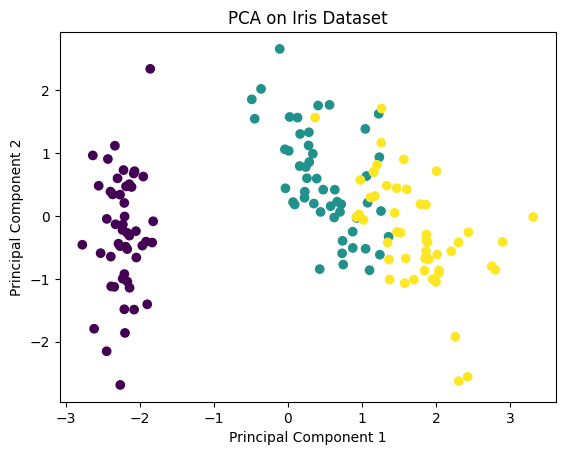

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

def standardize(X):
    """Standardize the dataset: mean of 0 and variance of 1 for each feature."""
    mean = np.mean(X, axis=0)
    print("mean shape",mean.shape)
    std_dev = np.std(X, axis=0)
    return (X - mean) / std_dev

def compute_covariance_matrix(X):
    """Compute the covariance matrix for the dataset."""
    n_samples = X.shape[0]
    return (X.T @ X) / (n_samples - 1)

def pca(X, n_components):
    """Perform PCA from scratch."""
    
    # Step 1: Standardize the dataset
    X_std = standardize(X)
    
    # Step 2: Compute the covariance matrix
    covariance_matrix = compute_covariance_matrix(X_std)
    
    # Step 3: Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Step 4: Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    
    # Step 5: Select the top n_components eigenvectors (principal components)
    principal_components = eigenvectors[:, :n_components]
    
    # Step 6: Transform the data to the new subspace
    X_pca = X_std @ principal_components
    
    return X_pca, eigenvalues, principal_components

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Only the features
y = iris.target  # The labels

# Perform PCA, reducing to 2 components
n_components = 2
X_pca, eigenvalues, principal_components = pca(X, n_components)

# Plot the transformed data (first 2 principal components)

plt.scatter(X_pca[:, 0], X_pca[:, 1],c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.show()
